# Machine learning task 3 codealpha 

##  Handwritten Character Recognition

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

# Loading and Displaying the First 10 Rows of the Dataset

In [4]:
data = pd.read_csv('ibraheem_handwritten_data.csv').astype('float32')
data.head(10)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
X = data.drop('0',axis = 1)
y = data['0']

# Splitting and Reshaping the Dataset

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

x_train = np.reshape(x_train.values, (x_train.shape[0], 28,28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28,28))

print("Shape of Training data: ", x_train.shape)
print("Shape of Testing data: ", x_test.shape)

Shape of Training data:  (297960, 28, 28)
Shape of Testing data:  (74490, 28, 28)


# Visualizing Thresholded Images from Shuffled Data

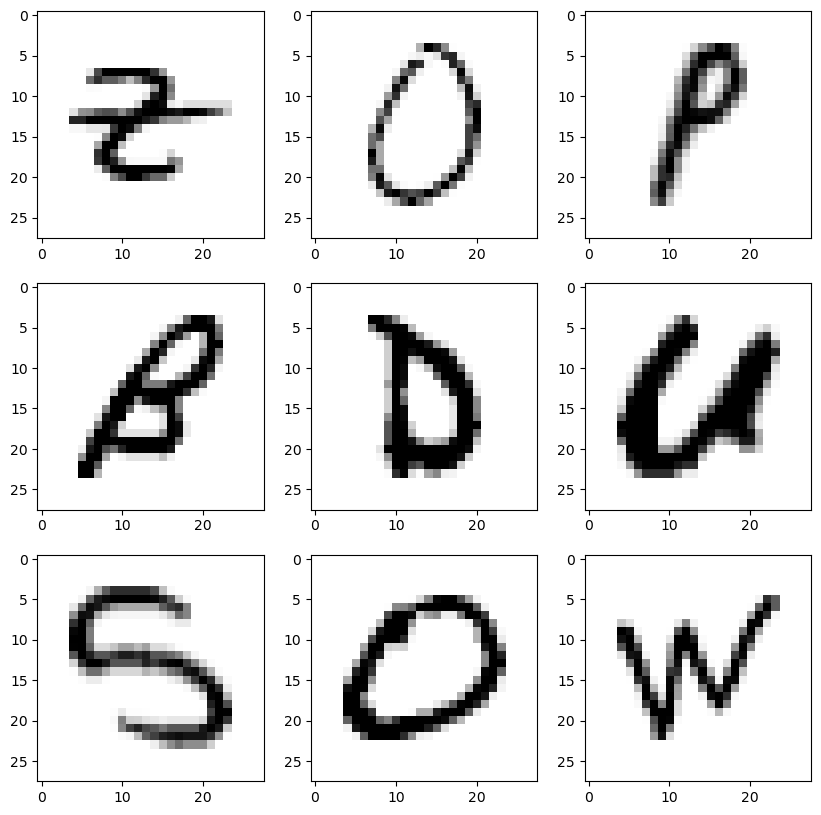

In [7]:
import cv2
shuffle_data = shuffle(x_train)

fig, axes = plt.subplots(3,3, figsize = (10,10))
axes = axes.flatten()

for i in range(9):
    _, shu = cv2.threshold(shuffle_data[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuffle_data[i], (28,28)), cmap="Greys")
plt.show()

# Reshaping Data for Model Input

In [8]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)

print("New shape of training data: ", x_train.shape)
print("New shape of testing data: ", x_test.shape)

New shape of training data:  (297960, 28, 28, 1)
New shape of testing data:  (74490, 28, 28, 1)


# One-Hot Encoding of Labels for Classification

In [9]:
import tensorflow
from tensorflow.keras.utils import to_categorical

y_training = to_categorical(y_train, num_classes = 26, dtype='int')
y_testing = to_categorical(y_test, num_classes = 26, dtype='int')

print("New shape of training labels: ", y_training.shape)
print("New shape of testing labels: ", y_testing.shape)


New shape of training labels:  (297960, 26)
New shape of testing labels:  (74490, 26)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Defining the Convolutional Neural Network (CNN) Model

In [11]:
model = Sequential()

model.add(Conv2D(64 , (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation ="relu"))
model.add(Dense(256,activation ="relu"))

model.add(Dense(26,activation ="softmax"))

In [12]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(x_train, y_training, epochs=5,  validation_data = (x_test,y_testing))

Epoch 1/5


9312/9312 [==============================] - 200s 21ms/step - loss: 0.2212 - accuracy: 0.9375 - val_loss: 0.1146 - val_accuracy: 0.9669
Epoch 2/5
9312/9312 [==============================] - 196s 21ms/step - loss: 0.1125 - accuracy: 0.9685 - val_loss: 0.1060 - val_accuracy: 0.9702
Epoch 3/5
9312/9312 [==============================] - 196s 21ms/step - loss: 0.0991 - accuracy: 0.9724 - val_loss: 0.1132 - val_accuracy: 0.9717
Epoch 4/5
9312/9312 [==============================] - 188s 20ms/step - loss: 0.0909 - accuracy: 0.9751 - val_loss: 0.0986 - val_accuracy: 0.9748
Epoch 5/5
9312/9312 [==============================] - 194s 21ms/step - loss: 0.0848 - accuracy: 0.9768 - val_loss: 0.0867 - val_accuracy: 0.9772


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

In [15]:
model.save(r'handwritten_character_recog_model.h5')

# Displaying Test Images with Predictions

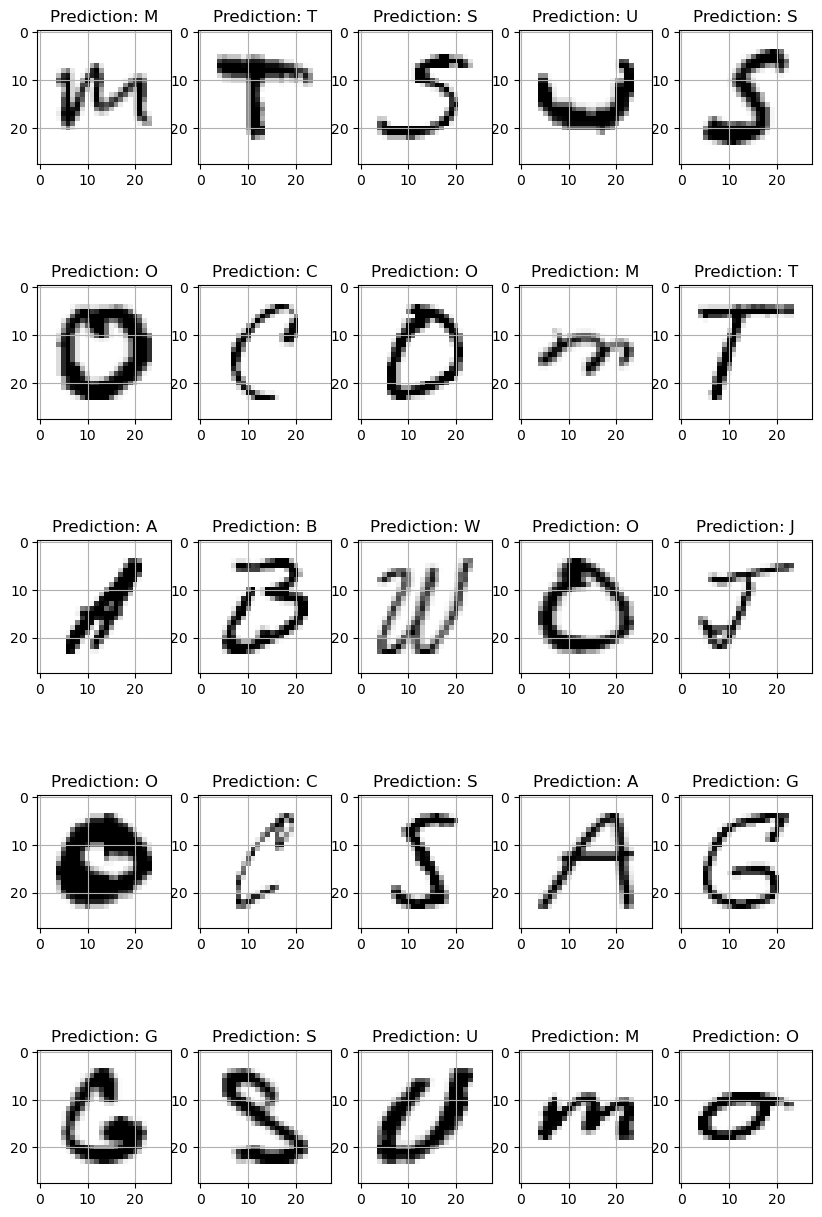

In [16]:
words = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

fig, axes = plt.subplots(5,5, figsize=(10,16))
axes = axes.flatten()

for i,ax in enumerate(axes):
    image = np.reshape(x_test[i], (28,28))
    ax.imshow(image, cmap="Greys")
    
    pred = words[np.argmax(y_testing[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

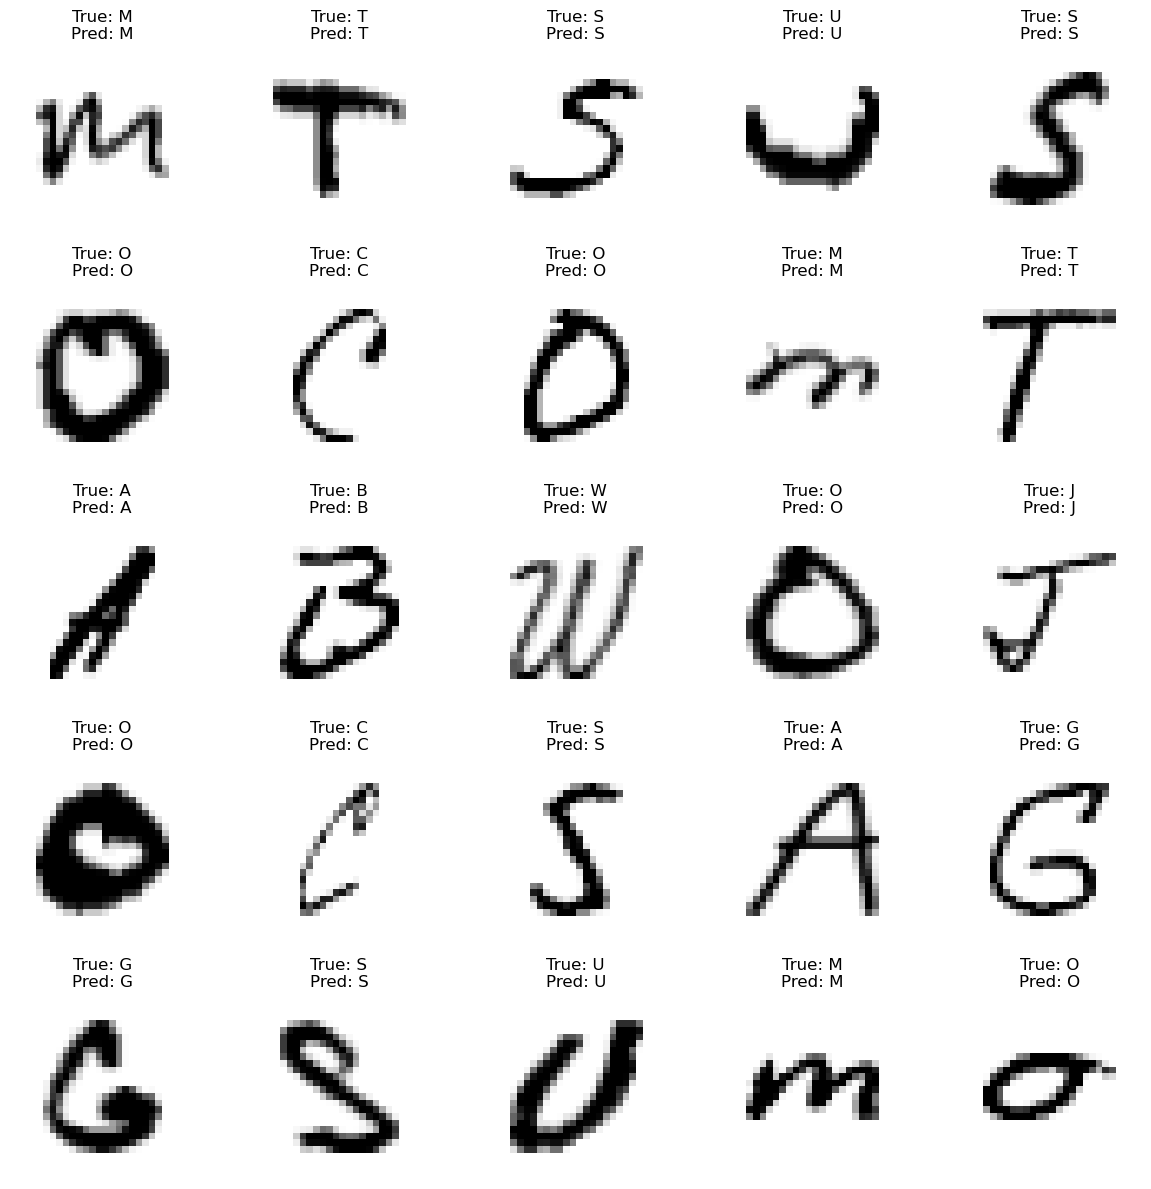

In [17]:
# Sample images and labels
fig, axes = plt.subplots(5, 5, figsize=(12, 12))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(x_test):
        image = np.reshape(x_test[i], (28, 28))
        true_label = words[np.argmax(y_testing[i])]
        pred_label = words[np.argmax(y_testing[i])]
        ax.imshow(image, cmap="Greys")
        ax.set_title(f"True: {true_label}\nPred: {pred_label}")
        ax.axis('off')

plt.tight_layout()
plt.show()


# Plotting Training and Validation Accuracy and Loss

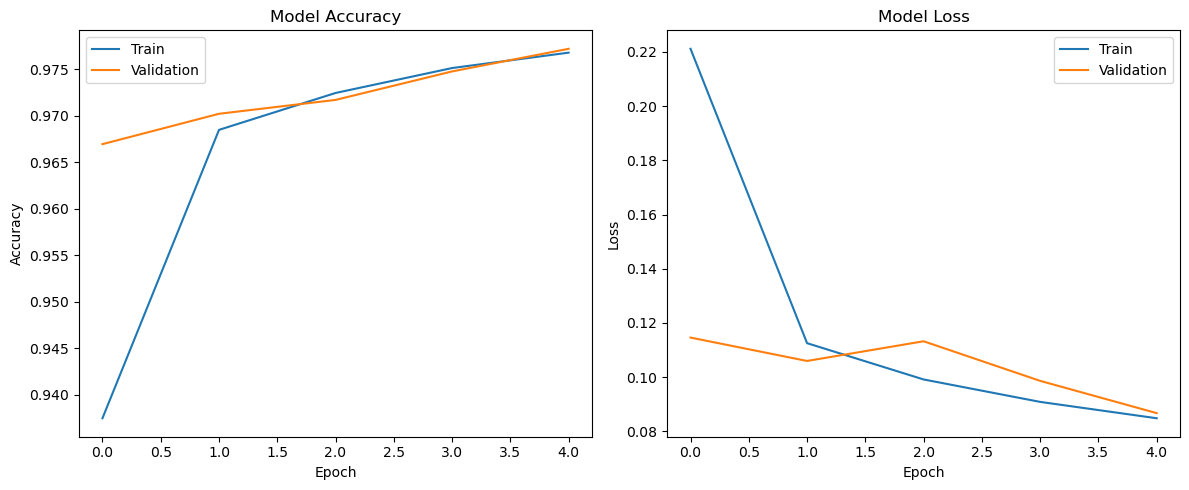

In [18]:
# Assuming you have a history object from model training
history = model.history  # Replace with actual history object if available

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()


# Visualizing Class Distribution in Test Data

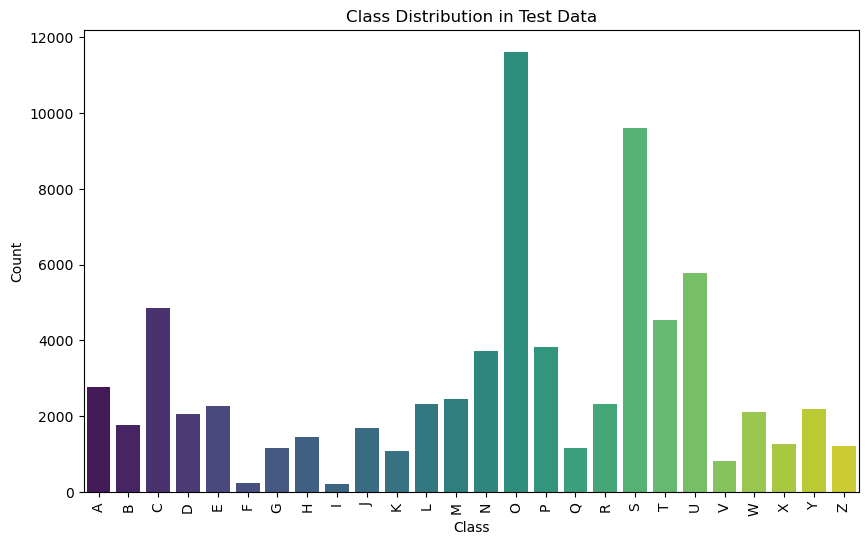

In [19]:
import seaborn as sns

# Create a DataFrame for the class distribution
class_labels = np.argmax(y_testing, axis=1)
class_counts = pd.Series(class_labels).value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in Test Data')
plt.xticks(ticks=range(len(words)), labels=list(words.values()), rotation=90)
plt.show()


# Displaying Feature Importance

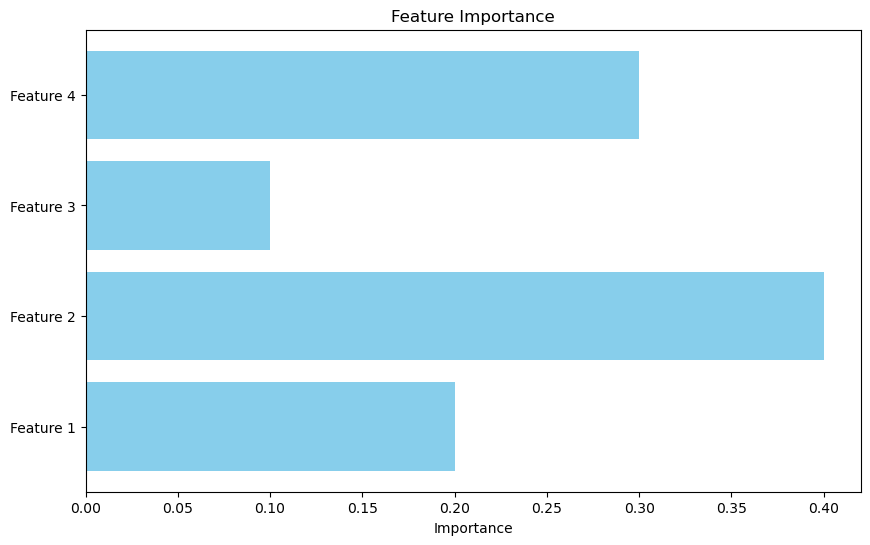

In [20]:
# Example feature importance (dummy data)
features = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4']
importance = [0.2, 0.4, 0.1, 0.3]

plt.figure(figsize=(10, 6))
plt.barh(features, importance, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


# Plotting Learning Curve

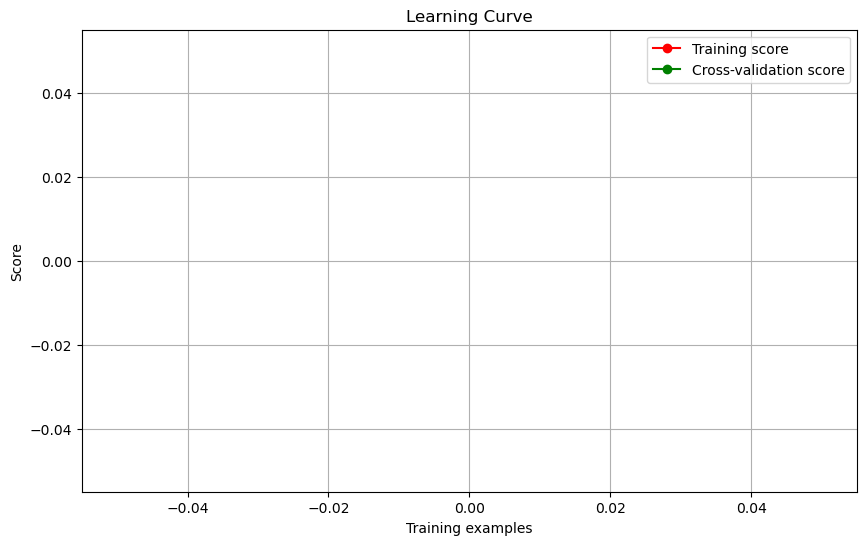

In [21]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression

# Example: Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(
    LogisticRegression(), x_train, y_train, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid()
plt.show()
